# Credit Card Fraud Detection - Logistic Regression

Importing the Dependencies

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard3.csv')

In [6]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3995,3637,-3.061576,-1.609474,1.266768,-0.188387,-1.378141,0.094377,0.527057,0.372759,1.746894,...,-0.298469,-0.583340,-0.388332,0.402433,-0.228393,0.730564,0.468322,-0.519314,437.17,0.0
3996,3637,1.171622,0.231544,0.674439,1.274870,-0.553417,-0.697918,-0.231447,-0.007440,1.408695,...,-0.163620,-0.350009,0.029405,0.394004,0.383792,-0.499815,-0.023091,0.006658,6.95,0.0
3997,3638,0.347370,-1.160738,1.011706,1.615779,-0.796071,1.240521,-0.421147,0.322980,1.813689,...,0.111878,0.029622,-0.258820,-0.322427,0.096853,-0.444063,0.011192,0.076735,360.46,0.0
3998,3638,-0.997800,1.099950,1.438566,-1.369962,0.364836,-0.419236,0.929917,-0.471805,1.588048,...,-0.346407,-0.399725,-0.139500,-0.446228,-0.185711,0.683184,-0.054256,-0.006615,37.96,0.0
3999,3639,-0.377328,0.606012,1.474296,-0.373168,0.551367,-0.602437,0.558113,-0.229391,1.134284,...,-0.319543,-0.729032,0.018198,-0.117900,-0.596078,-0.204930,-0.316321,-0.158255,1.98,0.0


In [8]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    4000 non-null   int64  
 1   V1      4000 non-null   float64
 2   V2      4000 non-null   float64
 3   V3      4000 non-null   float64
 4   V4      4000 non-null   float64
 5   V5      4000 non-null   float64
 6   V6      4000 non-null   float64
 7   V7      4000 non-null   float64
 8   V8      4000 non-null   float64
 9   V9      4000 non-null   float64
 10  V10     4000 non-null   float64
 11  V11     4000 non-null   float64
 12  V12     4000 non-null   float64
 13  V13     4000 non-null   float64
 14  V14     4000 non-null   float64
 15  V15     4000 non-null   float64
 16  V16     4000 non-null   float64
 17  V17     4000 non-null   float64
 18  V18     4000 non-null   float64
 19  V19     4000 non-null   float64
 20  V20     4000 non-null   float64
 21  V21     4000 non-null   float64
 22  

In [9]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0.0    3998
1.0       2
Name: count, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [11]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [12]:
print(legit.shape)
print(fraud.shape)

(3998, 31)
(2, 31)


In [13]:
# statistical measures of the data
legit.Amount.describe()

count    3998.000000
mean       64.965003
std       213.096173
min         0.000000
25%         2.280000
50%        13.080000
75%        54.875000
max      7712.430000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64

In [15]:
#counting number of fraud ang legit transactions
legit_count = legit['Class'].count()
fraud_count = fraud['Class'].count()

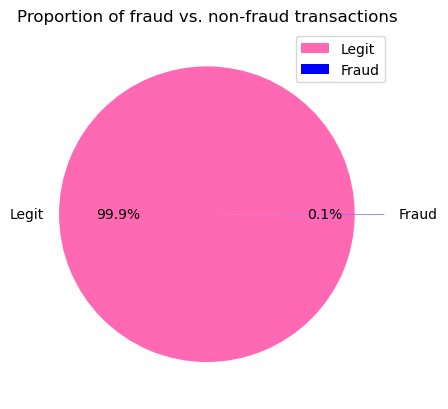

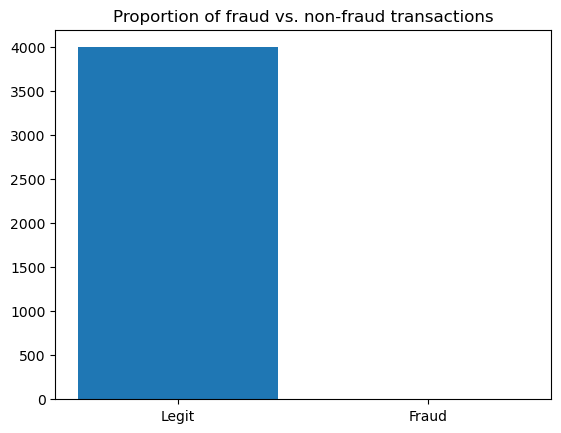

In [16]:
#plotting pie chart
import matplotlib.pyplot as plt
plt.pie([legit_count, fraud_count], labels = ['Legit', 'Fraud'], colors = ['hotpink', 'blue'], explode = [0, 0.2], autopct='%1.1f%%')
#explode separates two sectors, autopct displays percentage composition of data items
plt.legend()#displays legend
plt.title('Proportion of fraud vs. non-fraud transactions')#displays title
plt.show()
print()

#bar plot
plt.bar(['Legit', 'Fraud'],[legit_count, fraud_count]) #(x axis , y axis)
plt.title('Proportion of fraud vs. non-fraud transactions')
plt.show()
#this pie chart and bar pot show that the data is highly unbalanced, thus scaled it using log function

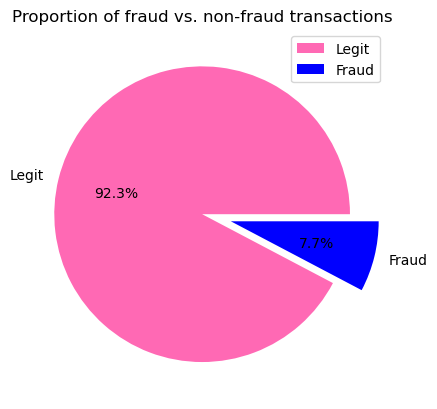

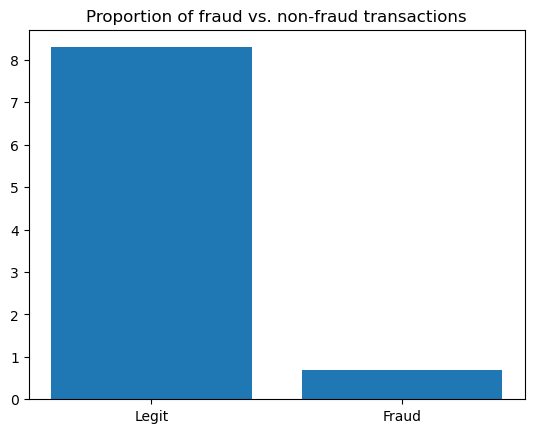

In [17]:
#scaling data
log_legit_count = np.log(legit_count)
log_fraud_count = np.log(fraud_count)

#plotting pie chart
plt.pie([log_legit_count, log_fraud_count], labels = ['Legit', 'Fraud'], colors = ['hotpink', 'blue'], explode = [0, 0.2], autopct='%1.1f%%')
#explode separates two sectors, autopct displays percentage composition of data items
plt.legend() #displays legend
plt.title('Proportion of fraud vs. non-fraud transactions') #displays title
plt.show()

print()

#plotting bar plot
plt.bar(['Legit', 'Fraud'],[log_legit_count, log_fraud_count]) #(x axis , y axis)
plt.title('Proportion of fraud vs. non-fraud transactions')
plt.show()

In [18]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1652.790895,-0.331647,0.308180,0.839827,0.015090,-0.028952,0.053751,0.146813,-0.071763,0.063828,...,0.058910,0.008930,-0.085439,-0.058608,0.028788,0.094629,-0.011728,0.044089,0.002472,64.965003
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [19]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [20]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [21]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1649,1272,1.316137,-0.042915,0.031241,-0.374424,-0.181753,-0.369846,-0.157204,-0.025647,0.080628,...,-0.115678,-0.354539,-0.065574,-0.442722,0.313855,0.995372,-0.089814,-0.015633,1.46,0.0
2795,2347,-1.045947,0.037230,2.505660,0.201052,0.269375,0.010774,-0.254784,0.409712,0.133263,...,0.043844,0.017746,-0.205174,-0.008489,0.537949,-0.489930,-0.006265,-0.012438,12.99,0.0
2694,2235,-1.787204,0.013612,2.249977,2.763243,0.746002,3.336379,-0.915483,-1.154089,0.612705,...,1.299637,0.148985,-0.030648,-0.973078,-1.345001,-0.030742,-0.080531,-0.189799,98.59,0.0
299,215,1.087792,-0.143548,1.374291,1.287399,-1.100642,-0.017110,-0.705609,0.266580,0.735368,...,-0.003904,0.112285,0.014104,0.512268,0.329602,-0.436531,0.063250,0.029067,12.99,0.0
2282,1827,1.157172,0.001714,0.586513,0.841548,-0.356916,-0.096327,-0.110257,-0.034711,0.432783,...,-0.039235,0.198242,-0.084661,0.181369,0.548537,0.462123,0.005807,0.012418,19.99,0.0


In [22]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3022,2573,-1.524550,-0.071558,0.788595,1.140430,0.277956,-0.395412,0.293238,0.518768,-1.177746,...,0.459135,0.704713,0.220639,0.246675,-0.306052,-0.348578,0.036590,-0.046935,137.52,0.0
2401,1959,-1.411784,-0.644733,2.029215,-0.361968,-0.698192,0.642439,0.754600,0.242317,-1.675757,...,-0.068489,-0.216641,0.395316,-0.058140,0.485601,-0.416702,0.000850,0.087316,265.38,0.0
2214,1743,-3.139569,2.645394,1.284583,-2.405997,0.356682,-0.287305,1.589679,-0.976351,3.096385,...,-0.744199,0.009628,-0.152336,0.015018,0.059899,0.563098,0.205393,-0.905637,0.92,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0


In [23]:
new_dataset['Class'].value_counts()

Class
0.0    492
1.0      2
Name: count, dtype: int64

In [24]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1733.317073,-0.380445,0.304949,0.867255,0.028256,-0.102301,0.088156,0.203408,-0.053775,0.064521,...,0.017018,0.016711,-0.112283,-0.049026,-0.004576,0.092518,0.023866,0.050273,0.008000,75.479858
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


In [25]:
#Applying Standard Normalisation for numerical data
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), ['Amount'])
    ]
)

In [26]:
transformed_amount = preprocessor.fit_transform(new_dataset)
transformed_amount

array([[-2.03929230e-01],
       [-1.72488430e-01],
       [ 6.09315568e-02],
       [-1.72488430e-01],
       [-1.53400347e-01],
       [-2.01775003e-01],
       [-2.04392798e-01],
       [-2.05183590e-01],
       [-2.02511258e-01],
       [-2.00575181e-01],
       [-8.14110054e-02],
       [-7.99112275e-02],
       [-2.07910459e-01],
       [-1.80696306e-01],
       [-1.25122716e-01],
       [-1.97357476e-01],
       [ 1.76016082e-02],
       [-1.91549245e-01],
       [-1.26595225e-01],
       [-2.05183590e-01],
       [-2.07774115e-01],
       [-2.05401739e-01],
       [ 1.16843025e-02],
       [-1.98093730e-01],
       [-1.14842419e-01],
       [-1.94494263e-01],
       [-1.25204522e-01],
       [-2.05183590e-01],
       [-1.74779000e-01],
       [-6.99854243e-02],
       [-1.42465603e-01],
       [-2.05183590e-01],
       [-6.39483902e-03],
       [-1.94276114e-01],
       [-1.70568968e-02],
       [ 5.23244928e-01],
       [-1.26131657e-01],
       [ 1.40447057e-01],
       [-2.3

Splitting the data into Features & Targets

In [27]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [28]:
print(X)

      Time        V1        V2        V3        V4        V5        V6  \
1649  1272  1.316137 -0.042915  0.031241 -0.374424 -0.181753 -0.369846   
2795  2347 -1.045947  0.037230  2.505660  0.201052  0.269375  0.010774   
2694  2235 -1.787204  0.013612  2.249977  2.763243  0.746002  3.336379   
299    215  1.087792 -0.143548  1.374291  1.287399 -1.100642 -0.017110   
2282  1827  1.157172  0.001714  0.586513  0.841548 -0.356916 -0.096327   
...    ...       ...       ...       ...       ...       ...       ...   
3022  2573 -1.524550 -0.071558  0.788595  1.140430  0.277956 -0.395412   
2401  1959 -1.411784 -0.644733  2.029215 -0.361968 -0.698192  0.642439   
2214  1743 -3.139569  2.645394  1.284583 -2.405997  0.356682 -0.287305   
541    406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   

            V7        V8        V9  ...       V20       V21       V22  \
1649 -0.157204 -0.025647  0.080628  ..

In [29]:
print(Y)

1649    0.0
2795    0.0
2694    0.0
299     0.0
2282    0.0
       ... 
3022    0.0
2401    0.0
2214    0.0
541     1.0
623     1.0
Name: Class, Length: 494, dtype: float64


Split the data into Training data & Testing Data

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(494, 30) (395, 30) (99, 30)


Model Training

Logistic Regression

In [32]:
model = LogisticRegression()

In [33]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

C:\Users\Aashi Bansal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(max_samples= 0.75, random_state= 42)

In [35]:
# Traning the model using Random Forest
model_RF.fit(X_train,Y_train)

RandomForestClassifier(max_samples=0.75, random_state=42)

In [36]:
# Making Predictions
Y_pred = model_RF.predict(X_test)
Y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Random Forest Model

In [37]:
# Issue - 44 : Implement Using Random Forest

# Importing the required library :
from sklearn.ensemble import RandomForestClassifier

# Applying the Random Forest Model :
rf = RandomForestClassifier(max_samples=0.75,random_state=42)
from sklearn.ensemble import RandomForestClassifier
# Fitting the Training Set into the model :
rf.fit(X_train,Y_train)

# Making Predicitions using Random Forest Model of Evaluation
y_pred_rf = rf.predict(X_test)

# Printing the Predictions made :
print("Predicitons made using the Random Forest Model are as follows : ")
y_pred_rf


Predicitons made using the Random Forest Model are as follows : 


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Model Evaluation

In [49]:
# Importing the required library :
from sklearn.model_selection import GridSearchCV

# In Addition, Adding the library to prevent the warning messages from being printed to the console :
import warnings
warnings.filterwarnings('ignore')

# Adding Hyperparameter Tuning with GridSearchCV for the Logisitc Regression Model :
param_grid_lr = {
    "C": [0.01, 0.1, 1, 10],  # Regularization strength
    "solver": ["liblinear", "lbfgs", "saga"],  # Supported solvers
    "penalty": ["l2"],  # `l2` is compatible with all solvers above
}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=7000), param_grid_lr, cv=5, scoring="accuracy")
grid_search_lr.fit(X_train, Y_train)
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


Accuracy Score

In [50]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [51]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [52]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [53]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  1.0


In [54]:
#VISUALISATION OF CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cmdt = pd.DataFrame(confusion_matrix(Y_test,X_test_prediction), index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])
cmdt

ValueError: Shape of passed values is (1, 1), indices imply (2, 2)

**Support Vector Machine Model**

In [55]:
# Issue #46 Implement using SVM
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)
pred_svm = svm.predict(X_test)
print("Predicitons made using the Support Vector Machine Model are as follows : ")
pred_svm

Predicitons made using the Support Vector Machine Model are as follows : 


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("SVM Accuracy:", accuracy_score(Y_test, pred_svm))
print("Classification report:",classification_report(Y_test, pred_svm))

SVM Accuracy: 1.0
Classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        99

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99

